In [1]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install nltk

     |████████████████████████████████| 1.5MB 3.3MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/41/c8/31/48ace4468e236e0e8435f30d33e43df48594e4d53e367cf061
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install textblob

     |████████████████████████████████| 645kB 3.4MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [8]:
consumer_key = 'u45ngwHcJhgtCybpctPgO0xMG'
consumer_secret = 'RxvvQWvmqLDZs1JLgReM7vD4rq2727MZVLiLlfHr3C9Wsmzw0U'
access_token = '879390376691453952-LMqqRPysWOrmyE9q3wDKYHrRftMjIFY'
access_secret = 'veZ0v6gJWLHPjtRPSiI3uNzUwKGzJXqPUgEb7Mi3Tn9Qq'

In [9]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [20]:
def remove_url(txt):
    """Replace URLs found in a text string with nothing 
    (i.e. it will remove the URL from the string).

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove urls.

    Returns
    -------
    The same txt string with url's removed.
    """

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())
# Create a custom search term and define the number of tweets
search_term = "#Trump+immigration -filter:retweets"

tweets = tw.Cursor(api.search, q=search_term, lang="en", since='2019-07-23', until='2019-07-24').items(500)

# Remove URLs
tweets_no_urls = [remove_url(tweet.text) for tweet in tweets]

In [11]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(tweet) for tweet in tweets_no_urls]

sentiment_objects[0].polarity, sentiment_objects[0]

TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity")

TextBlob("trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity")

In [12]:
# Create list of polarity valuesx and tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_values[0]
[0.0,
 'trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity']

[0.0,
 'trees and Nativeforests are immensely valuable SaveOurNativeForests ecocide is a crime against humanity']

In [13]:
# Create dataframe containing the polarity value and tweet text
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

sentiment_df.head()

,polarity,tweet
0,0.0,SenBillCassidy GooseGoodingIII Would be helpfu...
1,0.0,PortlandPolice Whats up with this No arrests W...
2,0.0,Dimms and Socialists Antifa and AntiAmericans ...
3,0.0,AmericaDecide POTUS Antifa covers their faces ...
4,0.0,These are communists just like antifa


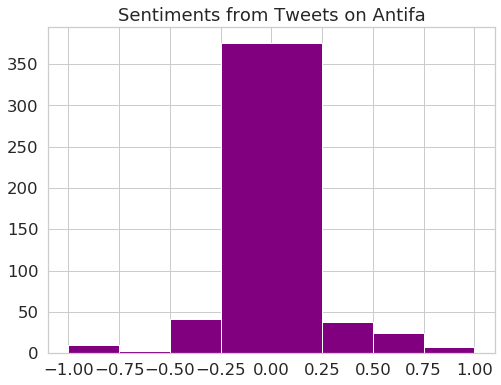

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="purple")

plt.title("Sentiments from Tweets on Antifa")
plt.show()

In [15]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import tweepy
api = tweepy.API(auth)
for tweet in tweepy.Cursor(api.search,
                           q="Antifa",
                           since="2019-07-21",
                           until="2019-07-22",
                           lang="en").items(50):
    print (tweet.created_at, tweet.text)

2019-07-21 23:59:58 RT @mir0ndy: Do you know how dangerous this is? Antifa is not an organisation. This means they can effectively call anyone they want - anyo…
2019-07-21 23:59:57 RT @MrAndyNgo: At this year's Portland "Womxn's March," Luis Marquez cursed me out while another female (unsuccessfully) tried to again hol…
2019-07-21 23:59:57 RT @RealJack: Antifa army in Berkeley warns “NO PHOTOS!”

This is the new KKK, sponsored once again by the Democrat party.

Funny how histo…
2019-07-21 23:59:57 RT @DrNealHouston: @HumaneFreedom @Serremmy @la700 @Okie08 @crzydug @Sekusa1 @BDMR22 @venmur1 @JoeTexas3 @rottaerkki @RodHillis1 @Credo5454…
2019-07-21 23:59:56 RT @RealJack: Antifa army in Berkeley warns “NO PHOTOS!”

This is the new KKK, sponsored once again by the Democrat party.

Funny how histo…
2019-07-21 23:59:56 RT @FaithGoldy: Maxime Bernier is expected to release his immigration plan this Wednesday in Mississauga.

Antifa is expected to protest ou…
2019-07-21 23:59:55 RT @annimmigra

In [17]:
import tweepy as tw
search_term = "#Antifa -filter:retweets"

tweets = tw.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2019-07-22', until='2019-07-23').items(250)

# Remove URLs and create textblob object for each tweet
all_tweets_no_urls = [TextBlob(remove_url(tweet.text)) for tweet in tweets]

all_tweets_no_urls[:20]

[TextBlob("RepMaxineWaters well look at U Queen antifa U litterally R the oldest amp BIGGEST hypocrite in office We dont"),
 TextBlob("ScottAdamsSays Neither are racist both groups are religious and ideological bigotsantifa Squad TheSquad"),
 TextBlob("Antifa is no different than Nazi Like half totalitarian brothers"),
 TextBlob("So Borat director Larry Charles claims that MAGAPeople are embracing violence Im sorry is he under the impre"),
 TextBlob("charliekirk11 look at the connections and relationshipsthe democrats will never allow it antifa is simply an"),
 TextBlob("JDoza1 The weak are the ones who uses such disgusting threats Now liberals hv their own Antifa movement as a res"),
 TextBlob("What a Liar AOC You amp your DemocRAT friends support AntiFa AntiFa Violent ThugsYou have it ALL WRONG Again"),
 TextBlob("Senate Introduces Bill to Label Antifa Domestic Terrorists"),
 TextBlob("We all knew this ScottBaio Im sorry you were attacked just for being TrumpSupporter Really tired of

In [18]:
# Calculate polarity of tweets
wild_sent_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in all_tweets_no_urls]

# Create dataframe containing polarity values and tweet text
wild_sent_df = pd.DataFrame(wild_sent_values, columns=["polarity", "tweet"])
wild_sent_df = wild_sent_df[wild_sent_df.polarity != 0]

wild_sent_df.head()

,polarity,tweet
2,-0.083333,Antifa is no different than Nazi Like half tot...
3,-0.500000,So Borat director Larry Charles claims that MA...
5,-0.193750,JDoza1 The weak are the ones who uses such dis...
6,-0.650000,What a Liar AOC You amp your DemocRAT friends ...
8,-0.450000,We all knew this ScottBaio Im sorry you were a...


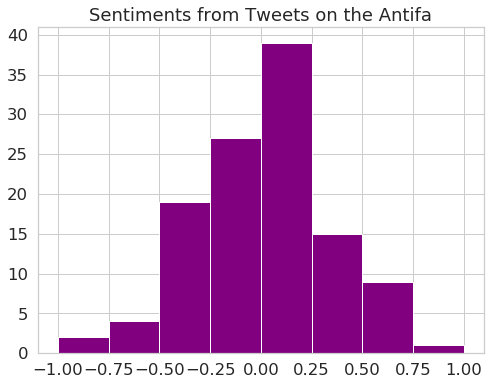

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

wild_sent_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],
        ax=ax, color="purple")

plt.title("Sentiments from Tweets on the Antifa")
plt.show()